In [20]:
import pandas
import tensorflow as tf
import matplotlib.pyplot as plot
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [33]:
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [38]:
def print_history_stat(history):
    print("[Last epoch] Loss: ", history.history["loss"][-1], 
    " Accuracy: ", history.history["accuracy"][-1])

def compile_and_fit(model, epoch_num=100, batch_sz=10, val_split=0.1, verb=0):
    model.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])
    history = model.fit(X, Y, epochs=epoch_num, batch_size=batch_sz,
    validation_split=val_split, verbose=verb)
    print_history_stat(history)
    return history

def init_plot(label1='Loss', label2='Accuracy'):
    figure, plot_arr = plot.subplots(2)
    plot_arr[0].set_title("Loss")
    plot_arr[1].set_title("Accuracy")
    return plot_arr

def append_to_plot(plot_arr, history, lbl=''):
    plot_arr[0].plot(history.history["loss"], label=lbl)
    plot_arr[1].plot(history.history["accuracy"], label=lbl)

def finalize_plot():
    plot.legend()
    plot.show()
    plot.clf()

plot.clf()

<Figure size 640x480 with 0 Axes>

[Last epoch] Loss:  0.2803015410900116  Accuracy:  0.903743326663971
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 30)                1830      
                                                                 
 dense_59 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


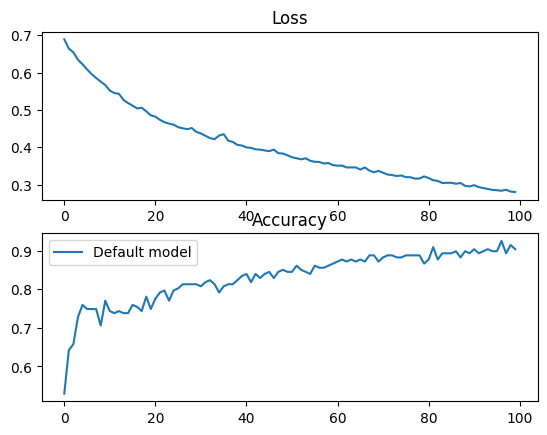

<Figure size 640x480 with 0 Axes>

In [47]:
plots = init_plot()

# NOTE init='normal' -> keyword 'init' not understood
model = Sequential(
    [
        Dense(30, input_dim=60, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
his = compile_and_fit(model)
model.summary()
append_to_plot(plots, his, "Default model")

finalize_plot()